## Separa os dados em treino e teste, treina o modelo, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado para predizer o consumo de cerveja.

In [114]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [115]:
# le os dados do dataset tratado recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_consumo_cerveja.csv')

In [116]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [117]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [118]:
# separa as variáveis: dependente_y e independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes
Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [119]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [120]:
# Faz a separação dos dados de treino X_train e y_train e de teste X_test e y_test
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, train_size=0.70, random_state=2)

In [121]:
# Criando a arquitetura da rede neural:
k_model = Sequential() # cria o modelo

k_model.add(Dense(units=5, # inclui uma camada intermediária com 5 neurônios
                 activation='relu', # função de ativação
                 input_dim=Xi_train.shape[1])) # passa a dimensão do df xi_train

k_model.add(Dense(units=1, # inclui a camada de saída com 1 neurônio apenas (temos 1 variável de saída)
                 activation='linear')) # função de ativação

In [122]:
# compila o modelo:
k_model.compile(loss='mse', # função de perda/custo, ajuda a minimizar o erro, diferença do previsto e calculado
                            # mse(erro quadrático médio) mede a quantidade de erros
                optimizer='adam', # otimização de adam, ajuda a aprender com eficiência e convergir para soluções
                                  # ideais
                metrics=['mae']) # métricas a serem avaliadas, mae(erro médio absoluto)

In [123]:
# treina a rede neural:
resultado = k_model.fit(Xi_train, yi_train, # dados de treino
                       epochs=200, # determina quantas vezes o modelo passará pelo conjunto de treinamento 
                                   # xi_train e yi_train
                       batch_size=32, # determina o nro de exemplos(linhas) contido no conjunto de treinamento, que
                                      # será utilizado de uma vez para atualizar os pesos antes de prosseguir com 
                                      # o treinamento
                       validation_data=(Xi_test, yi_test)) # ajuda a achar o ponto ideal do treinamento evitando
                                                           # overfit e underfit 

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 191.2149 - mae: 13.3420 - val_loss: 172.1988 - val_mae: 12.6353
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 169.0194 - mae: 12.4315 - val_loss: 146.9136 - val_mae: 11.6004
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 142.7872 - mae: 11.3283 - val_loss: 123.8970 - val_mae: 10.5712
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 123.0670 - mae: 10.4563 - val_loss: 103.4669 - val_mae: 9.5645
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 104.4528 - mae: 9.5336 - val_loss: 85.6712 - val_mae: 8.5905
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 88.3147 - mae: 8.6055 - val_loss: 70.4864 - val_mae: 7.6604
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 72.3936 - mae: 7.6538 - val_loss: 57.7572 - val_mae: 6.7811
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 61.7737 - mae: 6.8173 - val_loss: 47.2338 - val_mae: 5.9554
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

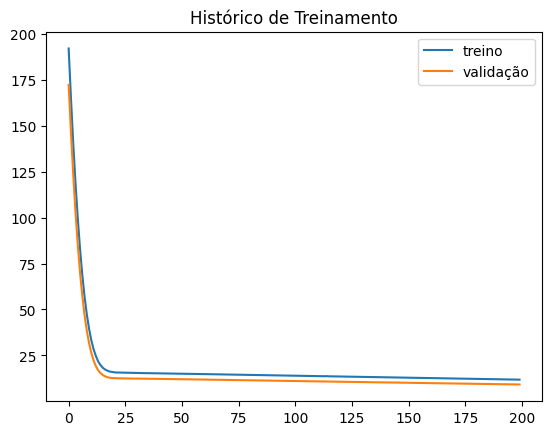

In [124]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['treino', 'validação'])
plt.show()

In [125]:
# o df de teste tem 3 colunas (variáveis independentes)
Xi_test.shape

(110, 3)

In [126]:
# fazendo uma predição com os dados de teste
# será feito uma predição para cada linha do xi_test na mesma unidade de cons_litros
xi_teste_pred = k_model.predict(Xi_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


In [127]:
# exibe o array com o resultado da predição
xi_teste_pred

array([[22.441965],
       [19.651964],
       [25.247643],
       [16.996796],
       [19.383871],
       [26.887737],
       [24.042168],
       [18.360136],
       [19.534441],
       [28.319857],
       [24.23232 ],
       [30.535913],
       [29.02155 ],
       [27.614275],
       [25.575874],
       [30.657082],
       [27.243492],
       [25.407074],
       [27.661648],
       [29.096962],
       [21.731827],
       [22.650578],
       [25.43876 ],
       [24.222546],
       [23.684593],
       [25.93137 ],
       [19.524418],
       [25.77037 ],
       [24.916483],
       [22.878996],
       [28.751429],
       [18.0761  ],
       [27.85205 ],
       [29.579094],
       [26.488712],
       [20.497843],
       [24.609734],
       [17.431355],
       [25.705694],
       [30.313627],
       [20.698925],
       [29.476856],
       [34.075428],
       [24.403376],
       [24.063782],
       [27.329323],
       [16.935299],
       [26.83353 ],
       [18.532976],
       [21.916302],


In [128]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(xi_teste_pred, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']